# Lecture 14

- Moments continued
- KDE on a dataset
- Statistical Inference
- Hypothesis tests


## Feedback Evaluation Form

[Fill this out!](https://forms.gle/ficQzQpWbfZzJVbb6)
Note: you need to be signed into Chrome or web browser through your UF account. The form, however, is anonymous.

## Last class

* We learned about different **moments** of PDFs.

<div class="alert alert-info">
    <b>Central Moments</b>
    
The **central moments** of a random variable (or of its distribution) are *expected values of mean-centered powers* or related functions of the random variable.

The $n$-th central moment of RV $X$ is $E[(X - \mu_X)^n]$, in general, $E[(X - E[X])^n]$.
    
If $X$ is a **continuous** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \int_x (t-\mu_X)^n f_X(t)~dt
\end{align*}
    
If $X$ is a **discrete** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \sum_x (x-\mu_X)^n p_X(x)
\end{align*}
</div>

* Moments of a random variable are expected values of the random variable raised to some power.

* For a *central moment*, the mean is subtracted from the random variable before it is raised to a power.

Because different powers spread the values of the random variable in different ways, **moments can provide additional information about a random variable other than the mean value**:

In mathematics, a moment is a specific quantitative measure of the shape of a function. The most important ones are: 

1. **Mean**, the 1st moment

2. **Variance**, the 2nd central moment 

3. **Skewness**, the 3rd central moment 

4. **kurtosis**, the 4th central moment

* We learnt how to think about **decision-making** and MAP in the case of distributions.

* We learnt about **KDE** (kernel density estimation)

## Today

* We will learn about how to infer an entire PDF from data using KDE

* We will learn about Statistical Inference - how do we directly estimate the parameters, here, the moments of a PDF

* We will learn about hypothesis tests: how do we prove or disprove hypotheses when faced with data, that go beyond the difference in means / medians.

___

In [2]:
import scipy.stats as stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('bmh')

___

<div class="alert alert-info">
    <b>Central Moments</b>
    
The **central moments** of a random variable (or of its distribution) are *expected values of mean-centered powers* or related functions of the random variable.

The $n$-th central moment of RV $X$ is $E[(X - \mu_X)^n]$, in general, $E[(X - E[X])^n]$.
    
If $X$ is a **continuous** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \int_x (t-\mu_X)^n f_X(t)~dt
\end{align*}
    
If $X$ is a **discrete** RV, the $n$-th central moment is
    
\begin{align*}
E[(X - \mu_X)^n] = \sum_x (x-\mu_X)^n p_X(x)
\end{align*}
</div>

* Moments of a random variable are expected values of the random variable raised to some power.

* For a *central moment*, the mean is subtracted from the random variable before it is raised to a power.

Because different powers spread the values of the random variable in different ways, **moments can provide additional information about a random variable other than the mean value**:

In mathematics, a moment is a specific quantitative measure of the shape of a function. The most important ones are: 

1. **Mean**, the 1st moment

2. **Variance**, the 2nd central moment 

3. **Skewness**, the 3rd central moment 

4. **kurtosis**, the 4th central moment

___

We saw that we can compute the most common moments of a random variable using the ```stats``` module, but let us go through what these moments actually describe: the shape of the distribution.

Let's go over what the moments describe, on the whiteboard.

___

# Kernel Density Estimation (KDE)

**Kernel density estimation (KDE)** is a non-parametric estimator of the probability density function (PDF) of a random variable. It is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. It uses a mixture consisting of a Kernel component centered at each data point.

* A density estimator is an algorithm which seeks to model the probability distribution that generated a data set. For one dimensional data, you are already familiar with one simple density estimator: the histogram. A histogram divides the data into discrete bins, counts the number of points that fall in each bin, and then visualizes the results in an intuitive manner.

* One of the issues with using a *histogram* as a density estimator is that the choice of bin size and location can lead to representations that have qualitatively different features. 

* In order to smooth them out, we might decide to replace the blocks at each location with a smooth function, like a Gaussian. 

* Look at Lecture13-supp.ipynb for more information on KDE!

In [3]:
G=stats.norm()
Gvals=G.rvs(size=100)
G25=stats.norm.rvs(size=25)

<IPython.core.display.Javascript object>


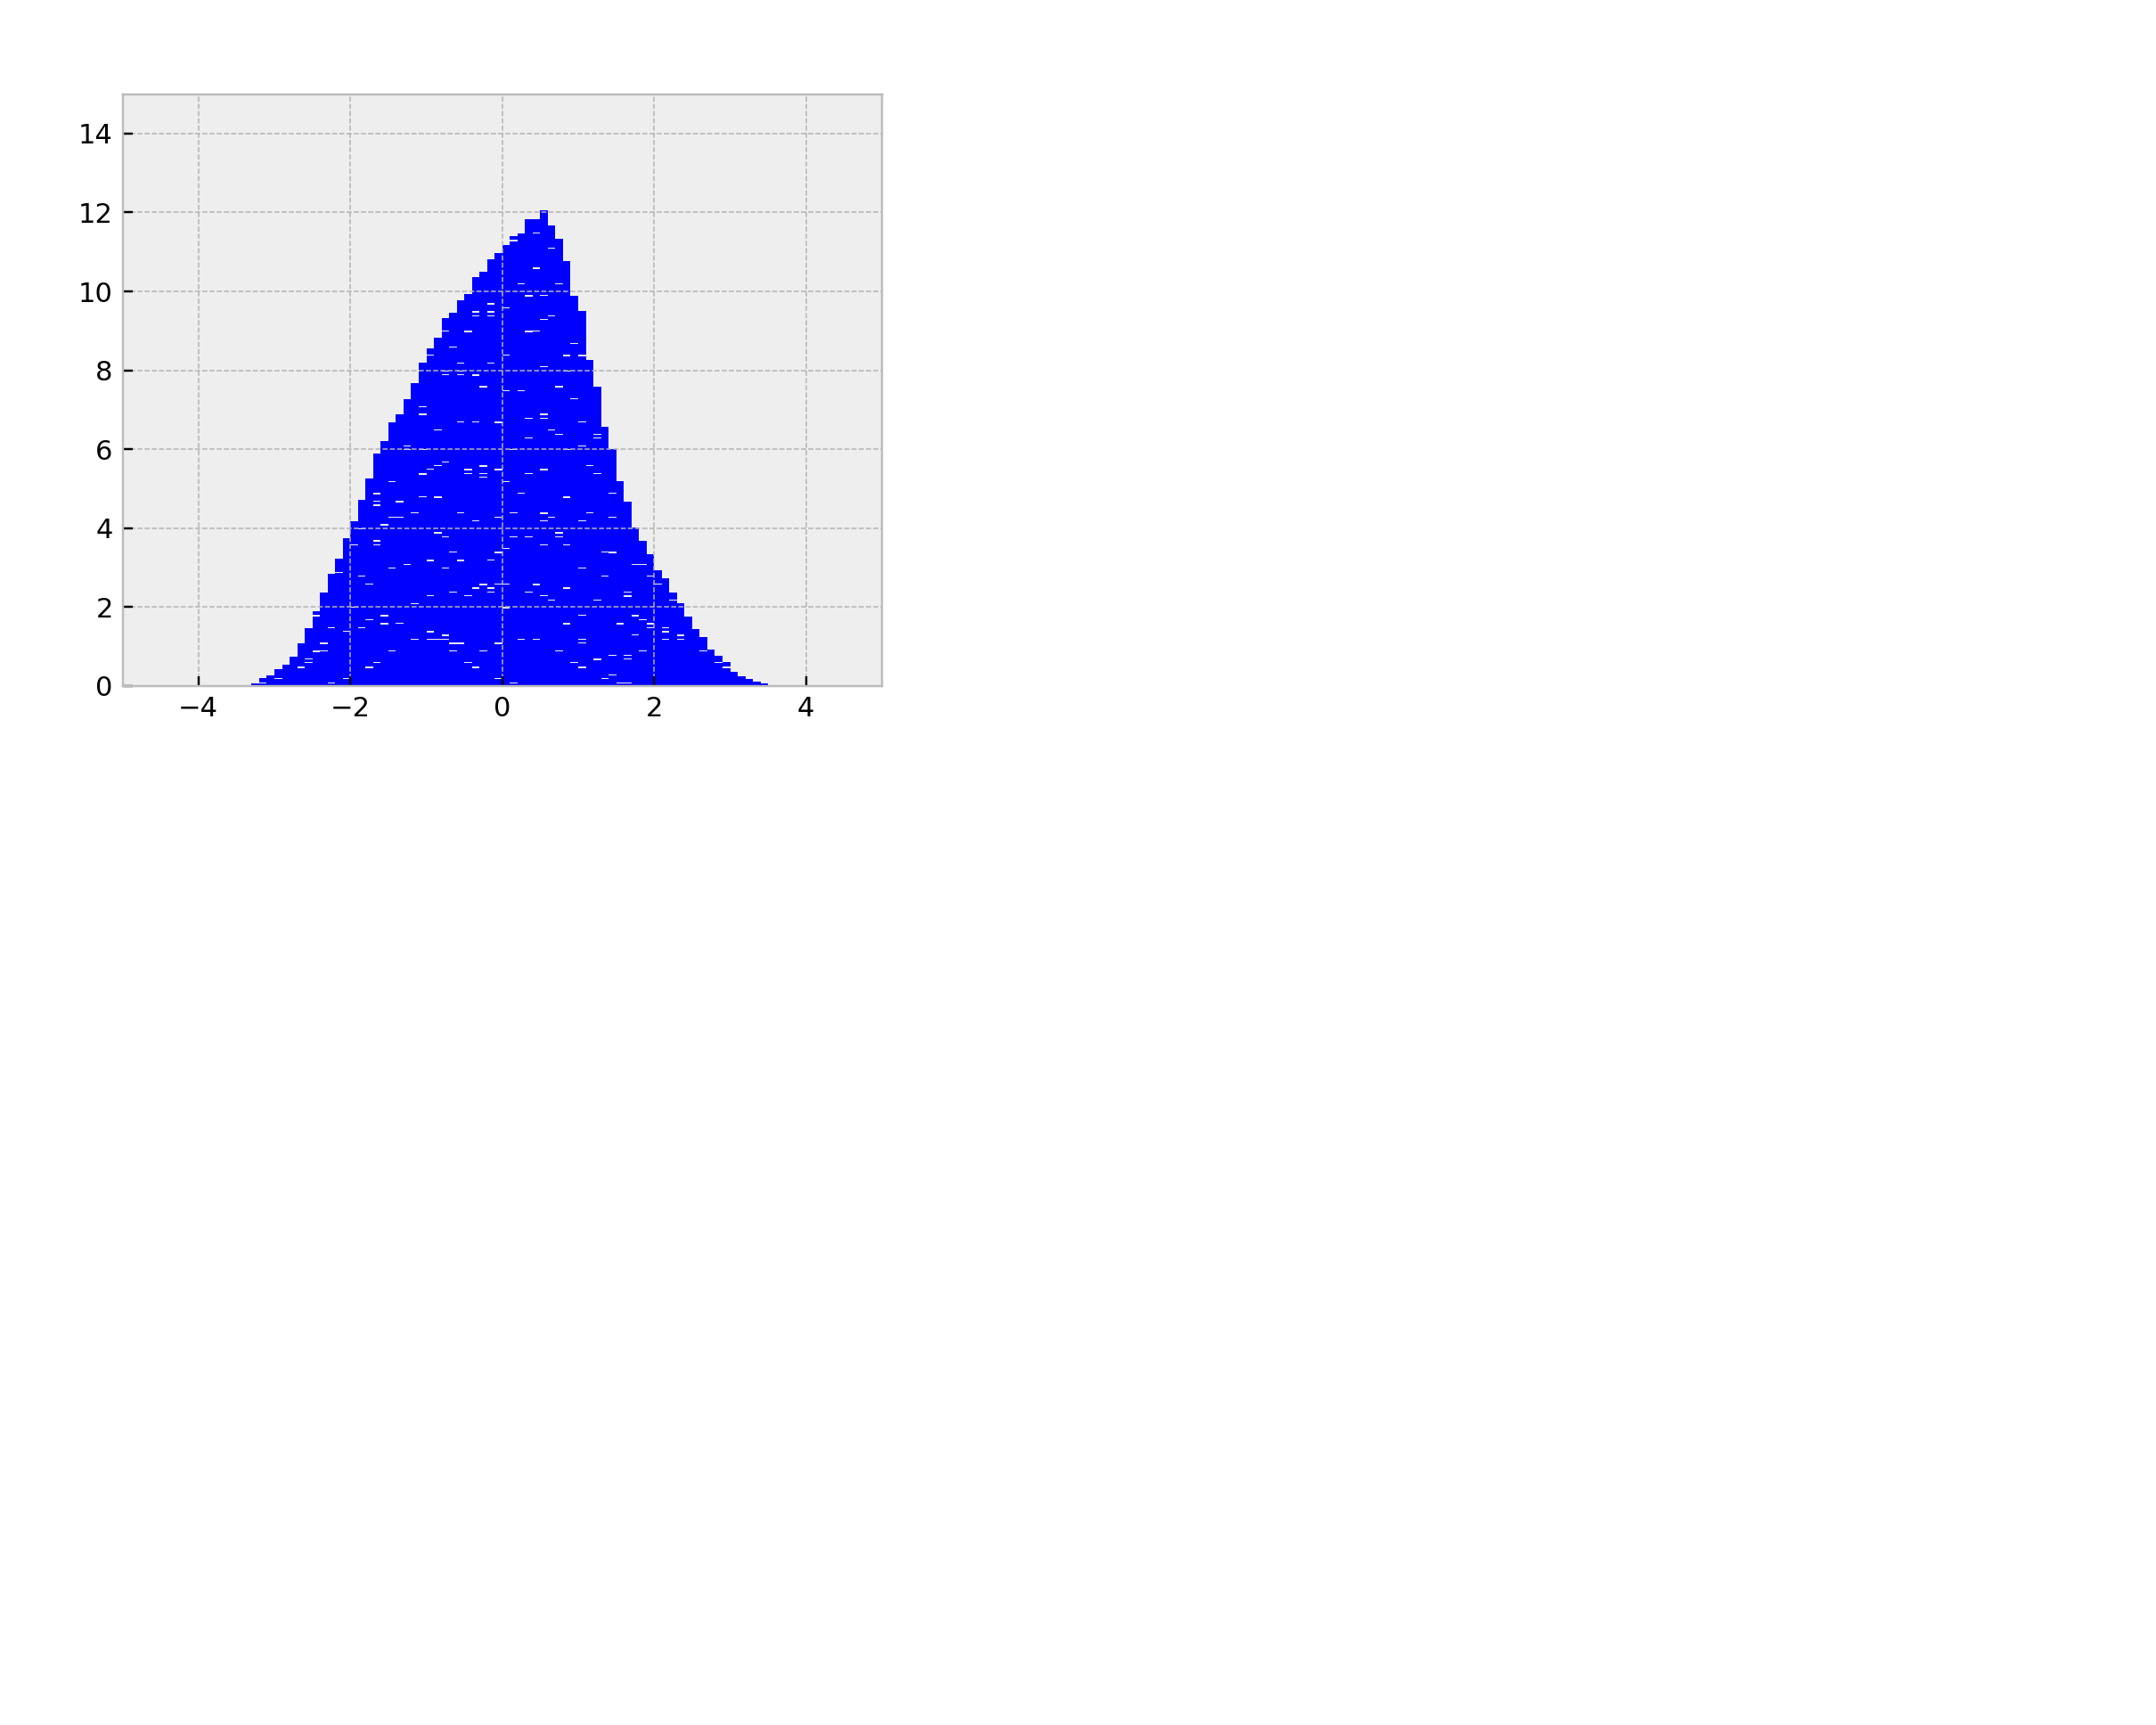

In [4]:
from matplotlib import animation
#This will do an animated histogram
%matplotlib notebook

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5, 4)

ax = plt.axes(xlim=(-5, 5), ylim=(0, 15))
blocks={}
floors={}
patchesPerBlock=25

def init():
    blocks['activeBlock']=0
    for num,var in enumerate(G25):
        center=round(var,1)
        blocks[num]=[]
        for i in range(patchesPerBlock):
            binedge=round(center+(i-patchesPerBlock//2)*0.1,1)
            patch = plt.Rectangle((binedge, 16), 0.1,
                                  stats.norm.pdf((i-patchesPerBlock//2)*0.1,scale=0.5)*1.5, fc='b')
            ax.add_patch(patch)
            blocks[num]+=[patch]
            floors[binedge]=0.01
        #print(num,var, patches)


    return []

def animatePatch(i, patch,update):
    return patch,

def animate(i, blocks):
    activeBlock=blocks['activeBlock']
    #print(activeBlock,blocks)
    numFloored=0
    for patch in blocks[activeBlock]:
        x,y=patch.xy
        if y<=floors[x]:
            #floors[x]=floors[x]+0.6
            #print("floors[",x,"]=",floors[x])
            patch.xy=(x,floors[x])
            numFloored+=1
        else:
            patch.xy=(x,y-0.2)
    if numFloored>=patchesPerBlock:
        for patch in blocks[activeBlock]:
            x,y=patch.xy
            floors[x]=round(floors[x]+patch.get_height(),1)
        blocks['activeBlock']=activeBlock+1
        activeBlock+=1
        if activeBlock not in blocks.keys():
            return []
        #print(patches[activePatch])
    for i in blocks:
        #print(patchnum)
        if i!='activeBlock':
            for patch in blocks[i]:
                animatePatch(i, patch,activeBlock==i)

    return[]

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=100*len(G25), 
                               fargs=(blocks,),
                               interval=5,
                               blit=True,repeat=False)
anim
plt.show()

Here is the same type of graph created with a wider, more finely quantized Gaussian shape and 100 Gaussian random variables:

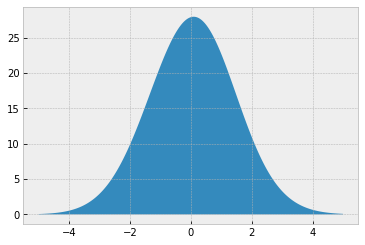

In [5]:
%matplotlib inline
x = np.linspace(-5,5, 1000)
density=np.zeros(x.size)
for xi in Gvals:
    ## Create new Gaussian RVs centered on the observation
    Gi=stats.norm(xi) 
    ## Use the density of the RV as the shape:
    density+=Gi.pdf(x) 
    
plt.fill_between(x, density);

**Magic!** This looks a lot like our density, even though we only had 100 observations!

The shape we use to build this new density estimate is called a **"kernel"**.

This approach is called **kernel density estimation (KDE)**.



* The free parameter of kernel density estimation is the **kernel** function, which specifies the shape of the distribution placed at each point, and the kernel **bandwidth**, which controls the size of the kernel at each point. In practice, there are many kernels you might use for a kernel density estimation: in particular, the Scikit-Learn KDE implementation supports six kernel functions, which you can read about in Scikit-Learn's [Density Estimation documentation](https://scikit-learn.org/stable/modules/density.html).

## Applying KDE to a dataset

In [6]:
df = pd.read_csv('firearms-urban.csv')

df

,STATE,RATE-2014,Percent Urban
0,AL,16.9,59.0
1,AK,19.2,66.0
2,AZ,13.5,89.8
3,AR,16.6,56.2
4,CA,7.4,95.0
5,CO,12.2,86.2
6,CT,5.0,88.0
7,DE,11.1,83.3
8,FL,11.5,91.2
9,GA,13.7,75.1


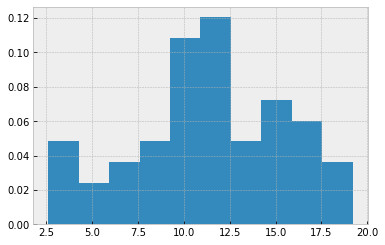

In [8]:
r14 = df['RATE-2014'].to_numpy()

plt.hist(r14, density = True);

In [17]:
G = stats.gaussian_kde(r14) # This uses KDE with a Gaussian kernel

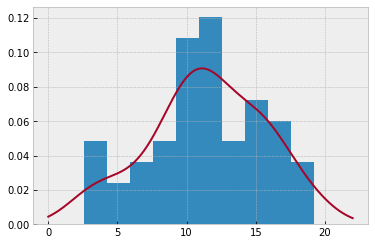

In [18]:
x = np.linspace(0,22,1000)

plt.hist(r14,density=True)

plt.plot(x, G.pdf(x));

In [19]:
# Draw random samples from this estimated density function

values = G.resample(size=50)
values[0]

array([12.17407336,  2.98300407,  4.68185045,  9.51943706, 11.19056936,
       19.80212086, 13.69465219,  7.59567056, 10.25305441,  1.80845309,
       11.90591407, 13.4931039 , 11.00684084,  7.68262871, 13.7636831 ,
        7.30735711, 12.88323426, 17.22610829, 18.09690921, 13.55600179,
       17.01789185,  5.92854774,  8.10621286, 13.39962589, 12.2443811 ,
       18.42532774,  7.58203363, 17.22715009,  3.55964296, 10.54177565,
       13.34408325, 15.92072999,  8.11604747, 11.98325097, 11.16012345,
       19.29532905, 18.92795329, 13.49526099, 10.85439057, 11.23107836,
       14.50061642,  7.86860863, 11.54471371, 15.88588627, 10.12161903,
        5.85170848, 14.17827307,  2.87766312,  9.04083911, 11.92653265])

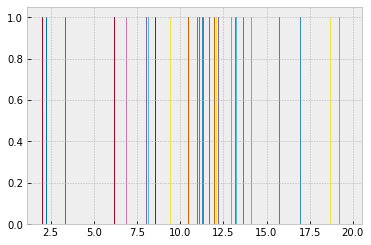

In [20]:
plt.hist(values);

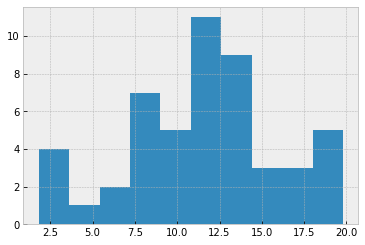

In [21]:
plt.hist(values[0]);

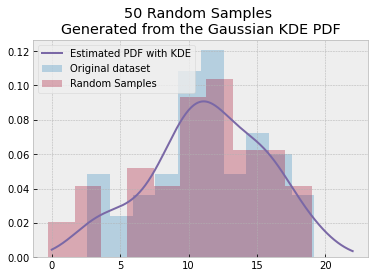

In [27]:
N=50

values = G.resample(size=N)

plt.hist(r14,density = True, alpha = 0.3, label = 'Original dataset')
plt.hist(values[0], density = True, alpha = 0.3, label='Random Samples')
plt.plot(x, G.pdf(x), label = 'Estimated PDF with KDE')


plt.legend()
plt.title(str(N)+' Random Samples \nGenerated from the Gaussian KDE PDF');

___

# Statistical Inference

We have developed the Bayesian approach to inference, where unknown parameters are modeled as random variables. In all cases we worked within a single, fully-specified probabilistic model, and we based most of our derivations and calculation on judicious application of Bayes's rule.

By contrast, we can adopt a fundamentally different philosophy: we can view the unknown probabilistic parameter $\theta$ of the probability function as a *deterministic* quantity (not random) but, nevertheless, unknown quantity.

* The observational data $X=\{x_i\}_{i=1}^N$ is random and its distribution $p_X(x;\theta)$ (if $X$ is discrete) or $f_X(x;\theta)$ (if $X$ is continuous) depends on the value of $\theta$ (the parameters of the distribution). 

* Thus, instead of working with a single probabilistic model, we will be dealing simultaneously with *multiple candidate (probabilistic) models*, one model for each possible value of $\theta$.

* In this context, a *good* hypothesis testing or estimation procedure will be one that possesses certain desirable properties *under every candidate model*.

## Classical Parameter Estimation

Given observations $X=\{x_1,x_2,\dots,x_N\}$, an **estimator** is a random variable of the form $\hat{\theta} = g(X)$, for some function $g$. Note that since the distribution of $X$ depends on $\theta$, the same is true for the distribution of $\hat{\theta}$.

### Some Terminology

Let $\hat{\theta}$ be an **estimator** of an unknown parameter $\theta$, that is, a function of $N$ observations $X=\{x_i\}_{i=1}^N$ whose distribution depends on $\theta$.

<div class="alert alert-info">
    <b>Error of Estimator</b>

The **estimated error** is denoted by $\epsilon_{\theta}(\hat{\theta})$, is defined as
    
\begin{align*}
\epsilon_{\theta} = \hat{\theta} - \theta
\end{align*}
</div>

<div class="alert alert-info">
    <b>Bias of Estimator</b>

The **bias** of an estimator, denoted by $b_{\theta}(\hat{\theta})$ is defined as
    
\begin{align*}
b_{\theta}(\hat{\theta}) = E[\hat{\theta}] - \theta
\end{align*}
</div>

<div class="alert alert-info">
    <b>Variance of Estimator</b>

The **variance** of an estimator, denoted by $\operatorname{Var}_{\theta}[\hat{\theta}]$ is defined as
    
\begin{align*}
\operatorname{Var}_{\theta}[\hat{\theta}] = E\left[\left(\hat{\theta} -E[\hat{\theta}]\right)^2\right]
\end{align*}
</div>

<div class="alert alert-info">
    <b>Mean-Square Error of Estimator</b>

The **Mean-Square Error** of an estimator, denoted by $E\left[(\hat{\theta}-\theta)^2\right]$ is defined as
    
\begin{align*}
E\left[(\hat{\theta}-\theta)^2\right] = b^2_{\theta}\left[\hat{\theta}\right] + \operatorname{Var}_{\theta}[\hat{\theta}]
\end{align*}
</div>

The expected value, the variance, and the bias of $\hat{\theta}$ depend on $\theta$, while the estimation error depends in addition on the observations $x_1,\cdots, x_N$.

<div class="alert alert-info">
    <b>Unbiased Estimator</b>

We call $\hat{\theta}$ **unbiased** if $E[\hat{\theta}] = \theta$, for every possible value of $\theta$.
</div>

<div class="alert alert-info">
    <b>Asymptotically Unbiased Estimator</b>

We call $\hat{\theta}$ **asymptotically unbiased** if $\lim_{N\rightarrow\infty} E[\hat{\theta}] = \theta$, for every possible value of $\theta$.
</div>

### The Bias-Variance Trade-Off

Besides the bias $b_{\theta}(\hat{\theta})$, we are usually interested in the size of the estimation error. This is captured by the **mean squared error**, $E\left[(\hat{\theta}-\theta)^2\right]$, which is related to the bias and the variance of $\hat{\theta}$ according to the following formula:

\begin{align*}
E\left[(\hat{\theta}-\theta)^2\right] = b^2_{\theta}\left[\hat{\theta}\right] + \operatorname{Var}_{\theta}[\hat{\theta}]
\end{align*}

This formula is important because in many statistical problems there is a **trade-off** between the two terms on the right-hand-side. Often a reduction in the variance is accompanied by an increase in the bias. Of course, a good estimator
is one that manages to keep both terms small. This is also known as **The Bias-Variance Trade-off**.

___

# Properties of Sum of Independent Gaussian RVs

Suppose now that we have two independent data samples, $X=\{x_1,x_2,\cdots,x_N\}$ and $Y=\{y_1,y_2,\cdots,y_N\}$, that we think can be modeled as coming from Gaussian distributions.

* If we observe a difference in the sample means for the two data sets, how can we determine analytically if the (true) means are different?

* Let's assume that distributions for the two data sets have a common variance and we know the variance, $\sigma^2$.

We need to know a few more facts about **sums of independent Gaussian random variables**:

1. If $X$ and $Y$ are independent RVs, then

\begin{align*}
Var[X +Y] = Var[X]+Var[Y]
\end{align*}

2. If $X$ and $Y$ are independent Gaussian random variables such that

\begin{align*}
X \sim \text{Gaussian}(\mu_X, \sigma_X^2)
\end{align*}

and
\begin{align*}
Y \sim \text{Gaussian}(\mu_Y, \sigma_Y^2)
\end{align*}

Then
\begin{align*}
Z = X+Y \sim \text{Gaussian}(\mu_Z, \sigma_Z^2)
\end{align*}

By linearity $\mu_z = \mu_X + \mu_Y$, and by the previous property $\sigma_Z^2 = \sigma_X^2 + \sigma_Y^2$.

3. If $Z$ is a Gaussian random variable, $aZ + b$ is also a Gaussian random variable.

___

Let's start by considering the statistic of a single sample mean,
    
\begin{align*}
\hat{\mu}_X = \frac{1}{N} \sum_{i=1}^N X_i
\end{align*}

By the properties above, we can see:

* $\hat{\mu}_X$ is a Gaussian random variable

* The mean of $\hat{\mu}_X$ is $E[\hat{\mu}_X] = \mu_X$

* The variance of $\hat{\mu}_X$ is 

\begin{align*}
Var\left[\frac{1}{N}\sum_{i=1}^N X_i\right] &= \frac{1}{N^2} Var\left[\sum_{i=1}^N X_i\right]\\
&= \frac{1}{N^2} \sum_{i=1}^N Var\left[X_i\right]\\
&= \frac{1}{N^2} \sum_{i=1}^N \sigma_X^2\\
&= \frac{\sigma_X^2}{N}
\end{align*}
    
Note that the variance of the sample mean decreases linearly as the sample size increases. 

**This can be used to show that the sample mean converges to the true mean if the variance of the original random variable is finite.**

___

# <font color=blue>Z-Test</font>: Binary Hypothesis Tests involving Sample Mean *with Known and Equal Variances*

Suppose we have two populations characterized by RVs $X$ and $Y$, and the following samples $\{x_i\}_{i=1}^M$ and $\{y_j\}_{j=1}^N$, where $x_i$ and $y_j$ are observed values of RVs $X$ and $Y$, which are assumed to have common variance $\sigma^2$.

* Let the averages of the data samples be

\begin{align*}
\bar{x} = \frac{1}{M}\sum_{i=1}^{M} x_i \text{, and } \bar{y} = \frac{1}{N}\sum_{j=1}^{N} y_j
\end{align*}

and denote the true means of the distributions $\mu_X$ and $\mu_Y$, respectively.

* Note that if the number of samples from each population is relatively large ($\geq 10$), then even if the original population does not have a Gaussian distribution, the averages will still be approximately Gaussian - Central Limit Theorem (CLT)

**If $\bar{x} \neq \bar{y}$, how can we conduct a binary hypothesis test on whether the two populations have different means?**

* What is the null hypothesis?

    * $H_0$: **the means are the same, $\mu_X = \mu_Y$**
    * $H_1$: **the means are not the same, $\mu_X \neq \mu_Y$**
    
* We will conduct this test only using the sample observations $\{x_i\}_{i=1}^M$ and $\{y_j\}_{j=1}^N$

Under the null hypothesis, we compute the difference in the sample averages and determine the probability that a difference that large would be observed under the null hypothesis.

Thus, our test statistic is the difference in averages

\begin{align*}
t = \bar{x} - \bar{y}
\end{align*}

* Let $\hat{\mu}_X$ and $\hat{\mu}_Y$ be the sample means of random samples of sizes $M$ and $N$ from $X$ and $Y$ RVs, respectively. We can view $t$ as an instantiation of

\begin{align*}
T = \hat{\mu}_X - \hat{\mu}_Y
\end{align*}

If $\mu_X = \mu_Y = \mu$, then $E[\hat{\mu}_X] = E[\hat{\mu}_Y] = \mu$. Then, by linearity

\begin{align*}
\mu_T = E[T] = E[\hat{\mu}_X - \hat{\mu}_Y] = E[\hat{\mu}_X] - E[\hat{\mu}_Y] = \mu - \mu = 0
\end{align*}

* We can compute the variance of $T$ under the null hypothesis as:

\begin{align*}
\sigma_T^2 &= Var[T] \\
&= Var[\hat{\mu}_X - \hat{\mu}_Y] \\
&= Var[\hat{\mu}_X + (-\hat{\mu}_Y)] \\
&= Var[\hat{\mu}_X] + Var[-\hat{\mu}_Y] \\
&= Var[\hat{\mu}_X] + (-1)^2 Var[\hat{\mu}_Y] \\
&= \frac{\sigma^2}{M} + \frac{\sigma^2}{N} \\
& = \left( \frac{1}{M} + \frac{1}{N} \right) \sigma^2
\end{align*}

Finally, we can compute the probability of observing a difference in means as large as $t = \bar{x} - \bar{y}$. For convenience of discussion, assume $\bar{x} > \bar{y}$:

Let $t$ be the observed difference $\bar{x}-\bar{y} > 0$.

Hypothesis test:

* What is $P(\text{see result as extreme under }H_0)$

    * One-sided Hypothesis test: 
    
\begin{align*}
P(T \geq t | H_0) = Q\left(\frac{t-\mu_T}{\sigma_T}\right) = Q\left(\frac{t}{\sigma \sqrt{\frac{1}{M}+\frac{1}{N}}}\right)
\end{align*}
    
    * Two-sided Hypothesis test:
    
\begin{align*}
P(|T| \geq t | H_0) = 2 Q\left(\frac{t}{\sigma \sqrt{\frac{1}{M}+\frac{1}{N}}}\right)
\end{align*}

<div class="alert alert-info">
    <b>Z-Test</b>
    
A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution. Z-tests test the mean of a distribution.

* Let $\hat{\mu}_X$ and $\hat{\mu}_Y$ be the sample means of random samples of sizes $M$ and $N$ from two RVs $X$ and $Y$, respectively, with common variance $\sigma^2$. We can build the statistic:

\begin{align*}
T = \hat{\mu}_X - \hat{\mu}_Y
\end{align*}

where $E[T] = 0$, $\operatorname{Var}[X] = \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)$ and 

\begin{align*}
T \sim G\left(0, \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)\right)
\end{align*}

</div>

**<font color=blue>Example 1</font> The city of Gainesville claims the mean commute time on SW 24th Ave from I-75 to UF is 23 minutes with a variance of 50. You traveled that route 10 times over the last two weeks and had an average commute time of 27 minutes. Conduct a hypothesis test to determine whether the City of Gainesville’s model is reasonable. Reject the null hypothesis if $p < 0.01$.**

1. What is the null hypothesis? Define the density under $H_0$.

<!-- Null Hypothesis: city's model is correct.

\begin{align*}
X_i \sim \text{Gaussian}(23, \sigma_X^2 = 50)
\end{align*} -->

2. Compute the sample mean, $\hat{\mu}$. Compute the bias and variance of the estimator $\hat{\mu}$.

<!-- \begin{align*}
\hat{\mu} = \frac{1}{10} \sum_{i=1}^{10} X_i\text{, (sample mean estimator)}
\end{align*}

\begin{align*}
E[\hat{\mu}] = 23 = \mu
\end{align*}

\begin{align*}
Var[\hat{\mu}] = \sigma^2_{\mu_X} = \frac{\sigma_X^2}{10} = \frac{50}{10} = 5
\end{align*} -->

3. What is the probability that observe a result this extreme, i.e., $P(\hat{\mu} \geq 27)$? Compute the one-sided and the two-sided hypothesis test probabilities.

<!-- One-sided hypothesis test:

\begin{align*}
P(\hat{\mu} \geq 27) = P\left(\frac{\hat{\mu} - 23}{\sigma_{\mu_X}} \geq \frac{27 - 23}{\sigma_{\mu_X}}\right) = P\left( Z \geq \frac{27-23}{\sqrt{5}} \right) = Q\left(\frac{27-23}{\sqrt{5}}\right) = Q\left(\frac{4}{\sqrt{5}}\right)
\end{align*}

Two-sided hypothesis test:

\begin{align*}
P(|\hat{\mu}| \geq 27) = 2Q\left(\frac{4}{\sqrt{5}}\right)
\end{align*} -->

**Conclusion:** 

<!-- We cannot reject the null hypothesis because p>0.01. The Gainesville's model is correct. -->

___